## Imports

In [1]:
import tensorflow as tf
from glob import glob
from os.path import join
from tensorflow.keras import layers, models
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imports.GDL_layers as GDL_layers

2022-08-29 11:41:47.081645: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## Load data

In [2]:
# Find a list of all the datafiles
patch_path = "/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/"
patch_files = sorted(glob(join(patch_path, "*.nc")))
patch_ds = xr.open_dataset(patch_files[0])
csv_path = "/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/"
csv_files = sorted(glob(join(csv_path, "track_step_*.csv")))
meta_ds = pd.read_csv(csv_files[0])

In [3]:
patch_files[0]

'/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20101024-0000_d01_model_patches.nc'

In [4]:
int(150*.8)

120

In [5]:
patch_files[149]

'/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20120614-0000_d01_model_patches.nc'

In [6]:
patch_ds

<xarray.Dataset>
Dimensions:           (p: 370, row: 144, col: 144)
Coordinates:
  * p                 (p) int32 0 1 2 3 4 5 6 7 ... 363 364 365 366 367 368 369
  * row               (row) int32 0 1 2 3 4 5 6 ... 137 138 139 140 141 142 143
  * col               (col) int32 0 1 2 3 4 5 6 ... 137 138 139 140 141 142 143
Data variables: (12/26)
    lon               (p, row, col) float32 ...
    lat               (p, row, col) float32 ...
    i                 (p, row, col) int32 ...
    j                 (p, row, col) int32 ...
    x                 (p, row, col) float32 ...
    y                 (p, row, col) float32 ...
    ...                ...
    MLCAPE_prev       (p, row, col) float32 ...
    USHR6_prev        (p, row, col) float32 ...
    VSHR6_prev        (p, row, col) float32 ...
    SBLCL_prev        (p, row, col) float32 ...
    U_BUNK_prev       (p, row, col) float32 ...
    V_BUNK_prev       (p, row, col) float32 ...
Attributes: (12/36)
    Conventions:             CF-1.6
    title:                   NCARSTORM Storm Patches for run 20101024-0000 me...
    object_variable:         REFL_COM
    start_hour:              12
    end_hour:                35
    HRRR_alt_end_hour:       46
    ...                      ...
    single_step:             True
    label_type:              gamma
    model_map_file:          /glade/work/cbecker/hagelslag/mapfiles/ncar_stor...
    mask_file:               None
    run_date_format:         %Y%m%d-%H%M
    json:                    False

In [7]:
meta_ds

,Step_ID,Track_ID,Ensemble_Name,Ensemble_Member,Run_Date,Valid_Date,Forecast_Hour,Valid_Hour_UTC,Duration,Centroid_Lon,...,eccentricity,major_axis_length,minor_axis_length,orientation,Matched,Max_Hail_Size,Num_Matches,Shape,Location,Scale
0,d01_REFL_COM_20101024-0000_12_13_000_00,d01_REFL_COM_20101024-0000_12_13_000,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-98.41019,...,0.90735,51.23550,21.53869,1.41172,0,0,0,0,0,0
1,d01_REFL_COM_20101024-0000_12_13_000_01,d01_REFL_COM_20101024-0000_12_13_000,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 13:00:00+00:00,13,13,2,-97.69198,...,0.85356,26.92719,14.02906,1.13923,0,0,0,0,0,0
2,d01_REFL_COM_20101024-0000_12_12_001_00,d01_REFL_COM_20101024-0000_12_12_001,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-95.15486,...,0.71815,8.65894,6.02569,0.74301,0,0,0,0,0,0
3,d01_REFL_COM_20101024-0000_12_13_002_00,d01_REFL_COM_20101024-0000_12_13_002,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-94.39792,...,0.58687,7.89825,6.39509,-1.28875,0,0,0,0,0,0
4,d01_REFL_COM_20101024-0000_12_13_002_01,d01_REFL_COM_20101024-0000_12_13_002,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 13:00:00+00:00,13,13,2,-94.21008,...,0.91899,27.65443,10.90375,0.32912,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,d01_REFL_COM_20101024-0000_35_35_238_00,d01_REFL_COM_20101024-0000_35_35_238,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-85.94177,...,0.44428,6.31100,5.65396,1.29480,0,0,0,0,0,0
366,d01_REFL_COM_20101024-0000_35_35_239_00,d01_REFL_COM_20101024-0000_35_35_239,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-85.16997,...,0.85947,79.05277,40.41106,0.12811,0,0,0,0,0,0
367,d01_REFL_COM_20101024-0000_35_35_240_00,d01_REFL_COM_20101024-0000_35_35_240,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-88.18374,...,0.92145,18.05184,7.01316,0.99009,0,0,0,0,0,0
368,d01_REFL_COM_20101024-0000_35_35_241_00,d01_REFL_COM_20101024-0000_35_35_241,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-82.50549,...,0.93744,14.44305,5.02817,-0.19595,0,0,0,0,0,0


In [8]:
# Pull selected variables from patch files and join into a single DataSet
num_files = 150
train_split = int(num_files*0.7)
val_split = int(num_files*0.8)
variables = ["REFL_COM_curr", "masks"]
data_list = []
for p, patch_file in enumerate(patch_files[0:train_split]):
    if p % 10 == 0:
        print(f'Train {p}, {patch_file}')
    ds = xr.open_dataset(patch_file)
    data_list.append(ds[variables].compute())
    ds.close()
input_train = xr.concat(data_list, dim="p")["REFL_COM_curr"].expand_dims("channel", axis = -1)
train_masks = xr.concat(data_list, dim="p")["masks"]
data_list = []
for p, patch_file in enumerate(patch_files[train_split:val_split]):
    if p % 10 == 0:
        print(f'Validation {train_split + p}, {patch_file}')
    ds = xr.open_dataset(patch_file)
    data_list.append(ds[variables].compute())
    ds.close()
input_val = xr.concat(data_list, dim="p")["REFL_COM_curr"].expand_dims("channel", axis = -1)
val_masks = xr.concat(data_list, dim="p")["masks"]
data_list = []
for p, patch_file in enumerate(patch_files[val_split:num_files]):
    if p % 10 == 0:
        print(f'Test {val_split + p}, {patch_file}')
    ds = xr.open_dataset(patch_file)
    data_list.append(ds[variables].compute())
    ds.close()
input_test = xr.concat(data_list, dim="p")["REFL_COM_curr"].expand_dims("channel", axis = -1)
test_masks = xr.concat(data_list, dim="p")["masks"]

Train 0, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20101024-0000_d01_model_patches.nc
Train 10, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110201-0000_d01_model_patches.nc
Train 20, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110326-0000_d01_model_patches.nc
Train 30, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110414-0000_d01_model_patches.nc
Train 40, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110425-0000_d01_model_patches.nc
Train 50, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110522-0000_d01_model_patches.nc
Train 60, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110605-0000_d01_model_patches.nc
Train 70, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110615-0000_d01_model_patches.nc
Train 80, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_2

In [9]:
# Pull variables from csv files and join into an array
csv_variables = ["major_axis_length", "minor_axis_length"]
csv_data_list = []
for p, csv_file in enumerate(csv_files[0:train_split]):
    if p % 10 == 0:
        print(f'Train {p}, {csv_file}')
    csv_ds = pd.read_csv(csv_file)
    csv_data_list.append(csv_ds[csv_variables].to_xarray().rename({'index': 'p'}))
output_train = xr.concat(csv_data_list, dim="p").to_array().transpose()
csv_data_list = []
for p, csv_file in enumerate(csv_files[train_split:val_split]):
    if p % 10 == 0:
        print(f'Validation {train_split + p}, {csv_file}')
    csv_ds = pd.read_csv(csv_file)
    csv_data_list.append(csv_ds[csv_variables].to_xarray().rename({'index': 'p'}))
output_val = xr.concat(csv_data_list, dim="p").to_array().transpose()
csv_data_list = []
for p, csv_file in enumerate(csv_files[val_split:num_files]):
    if p % 10 == 0:
        print(f'Test {val_split + p}, {csv_file}')
    csv_ds = pd.read_csv(csv_file)
    csv_data_list.append(csv_ds[csv_variables].to_xarray().rename({'index': 'p'}))
output_test = xr.concat(csv_data_list, dim="p").to_array().transpose()

Train 0, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20101024-0000.csv
Train 10, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110201-0000.csv
Train 20, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110326-0000.csv
Train 30, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110414-0000.csv
Train 40, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110425-0000.csv
Train 50, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110522-0000.csv
Train 60, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110605-0000.csv
Train 70, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110615-0000.csv
Train 80, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTO

In [10]:
print(input_train.shape)
print(input_val.shape)
print(input_test.shape)
print(output_train.shape)
print(output_val.shape)
print(output_test.shape)

(34061, 144, 144, 1)
(4300, 144, 144, 1)
(12985, 144, 144, 1)
(34061, 2)
(4300, 2)
(12985, 2)


## Normalize data

In [10]:
# Normalize the input data
scale_stats = pd.DataFrame(index=[0], columns=["mean", "sd"])
scale_stats.loc[0, "mean"] = input_train.mean()
scale_stats.loc[0, "sd"] = input_train.std()
input_train_norm = (input_train - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]
input_val_norm = (input_val - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]
input_test_norm = (input_test - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]

In [11]:
# Normalize the output data
output_scale_stats = pd.DataFrame(index=range(output_train.shape[-1]), columns=["mean", "sd"])
output_scale_stats.loc[:, "mean"] = output_train.mean(dim="p")
output_scale_stats.loc[:, "sd"] = output_train.std(dim="p")
output_train_norm = xr.DataArray(coords=output_train.coords, dims=output_train.dims)
output_val_norm = xr.DataArray(coords=output_val.coords, dims=output_val.dims)
output_test_norm = xr.DataArray(coords=output_test.coords, dims=output_test.dims)
for i in range(output_train.shape[-1]):
    output_train_norm[:, i] = (output_train[:, i] - output_scale_stats.loc[i, "mean"]) / output_scale_stats.loc[i, "sd"]
    output_val_norm[:, i] = (output_val[:, i] - output_scale_stats.loc[i, "mean"]) / output_scale_stats.loc[i, "sd"]
    output_test_norm[:, i] = (output_test[:, i] - output_scale_stats.loc[i, "mean"]) / output_scale_stats.loc[i, "sd"]

## RICNN

In [53]:
ricnn_model = models.Sequential()
ricnn_model.add(GDL_layers.RotEquivConv2D(32, (3, 3), rot_axis=False, input_shape=(144, 144, 1)))
ricnn_model.add(GDL_layers.RotEquivPool2D((2, 2)))
ricnn_model.add(GDL_layers.RotEquivConv2D(32, (3, 3)))
ricnn_model.add(GDL_layers.RotEquivPool2D((2, 2)))
ricnn_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
ricnn_model.add(GDL_layers.RotEquivPool2D((2, 2)))
ricnn_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
ricnn_model.add(GDL_layers.RotEquivPool2D((2, 2)))
ricnn_model.add(GDL_layers.RotEquivConv2D(128, (3, 3)))
ricnn_model.add(GDL_layers.RotInvPool())
ricnn_model.add(layers.Flatten())
ricnn_model.add(layers.Dense(32, activation='relu'))
ricnn_model.add(layers.Dense(2))

In [54]:
ricnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rot_equiv_conv2d_10 (RotEqu  (None, 142, 142, 4, 32)  320       
 ivConv2D)                                                       
                                                                 
 rot_equiv_pool2d_8 (RotEqui  (None, 71, 71, 4, 32)    0         
 vPool2D)                                                        
                                                                 
 rot_equiv_conv2d_11 (RotEqu  (None, 69, 69, 4, 32)    9248      
 ivConv2D)                                                       
                                                                 
 rot_equiv_pool2d_9 (RotEqui  (None, 34, 34, 4, 32)    0         
 vPool2D)                                                        
                                                                 
 rot_equiv_conv2d_12 (RotEqu  (None, 32, 32, 4, 64)   

In [55]:
ricnn_model.compile(
    optimizer='nadam',
    loss='mse',
    metrics=['mse']
)

In [56]:
ricnn_history = ricnn_model.fit(x=input_train_norm, y=output_train_norm, epochs=10, validation_data=(input_val_norm, output_val_norm))

Epoch 1/10
1064/1065 [============================>.] - ETA: 0s - loss: 0.2500 - mse: 0.2500WARNING:tensorflow:Keras is training/fitting/evaluating on array-like data. Keras may not be optimized for this format, so if your input data format is supported by TensorFlow I/O (https://github.com/tensorflow/io) we recommend using that to load a Dataset instead.


1065/1065 [==============================] - 81s 72ms/step - loss: 0.2499 - mse: 0.2499 - val_loss: 0.0845 - val_mse: 0.0845
Epoch 2/10
1065/1065 [==============================] - 78s 74ms/step - loss: 0.1037 - mse: 0.1037 - val_loss: 0.0770 - val_mse: 0.0770
Epoch 3/10
1065/1065 [==============================] - 75s 70ms/step - loss: 0.0689 - mse: 0.0689 - val_loss: 0.0462 - val_mse: 0.0462
Epoch 4/10
1065/1065 [==============================] - 78s 74ms/step - loss: 0.0502 - mse: 0.0502 - val_loss: 0.0487 - val_mse: 0.0487
Epoch 5/10
1065/1065 [==============================] - 80s 75ms/step - loss: 0.0447 - mse: 0.0447 - val_loss: 0.0417 - val_mse: 0.0417
Epoch 6/10
1065/1065 [==============================] - 76s 71ms/step - loss: 0.0352 - mse: 0.0352 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 7/10
1065/1065 [==============================] - 75s 71ms/step - loss: 0.0365 - mse: 0.0365 - val_loss: 0.0433 - val_mse: 0.0433
Epoch 8/10
1065/1065 [==============================] - 75s

## CNN

In [67]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(144, 144, 1)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(32, activation='relu'))
cnn_model.add(layers.Dense(2))

In [68]:
cnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 142, 142, 32)      320       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 71, 71, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 69, 69, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 34, 34, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 16, 16, 64)      

In [69]:
cnn_model.compile(
    optimizer='nadam',
    loss='mse',
    metrics=['mse']
)

In [70]:
cnn_history = cnn_model.fit(x=input_train_norm, y=output_train_norm, epochs=10, validation_data=(input_val_norm, output_val_norm))

Epoch 1/10
1062/1065 [============================>.] - ETA: 0s - loss: 0.3242 - mse: 0.3242WARNING:tensorflow:Keras is training/fitting/evaluating on array-like data. Keras may not be optimized for this format, so if your input data format is supported by TensorFlow I/O (https://github.com/tensorflow/io) we recommend using that to load a Dataset instead.


1065/1065 [==============================] - 19s 17ms/step - loss: 0.3242 - mse: 0.3242 - val_loss: 0.1518 - val_mse: 0.1518
Epoch 2/10
1065/1065 [==============================] - 17s 16ms/step - loss: 0.1649 - mse: 0.1649 - val_loss: 0.1512 - val_mse: 0.1512
Epoch 3/10
1065/1065 [==============================] - 18s 17ms/step - loss: 0.1226 - mse: 0.1226 - val_loss: 0.0773 - val_mse: 0.0773
Epoch 4/10
1065/1065 [==============================] - 18s 17ms/step - loss: 0.0896 - mse: 0.0896 - val_loss: 0.0671 - val_mse: 0.0671
Epoch 5/10
1065/1065 [==============================] - 18s 17ms/step - loss: 0.0711 - mse: 0.0711 - val_loss: 0.0787 - val_mse: 0.0787
Epoch 6/10
1065/1065 [==============================] - 17s 16ms/step - loss: 0.0572 - mse: 0.0572 - val_loss: 0.0648 - val_mse: 0.0648
Epoch 7/10
1065/1065 [==============================] - 18s 17ms/step - loss: 0.0491 - mse: 0.0491 - val_loss: 0.0591 - val_mse: 0.0591
Epoch 8/10
1065/1065 [==============================] - 18s

## History Plots

(0.0, 0.33920376673340796)

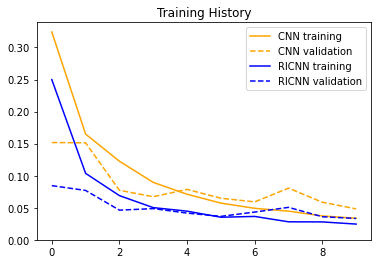

In [72]:
F, ax = plt.subplots()
ax = plt.gca()
a = ax.plot(cnn_history.history['mse'], label='CNN training', color='orange')
b = ax.plot(cnn_history.history['val_mse'], label='CNN validation', color='orange', linestyle='dashed')
c = ax.plot(ricnn_history.history['mse'], label='RICNN training', color='blue')
d = ax.plot(ricnn_history.history['val_mse'], label='RICNN validation', color='blue', linestyle='dashed')
ax.legend()
ax.set_title("Training History")
ax.set_ylim(bottom=0)

## Save and load models

In [84]:
ricnn_model.save("saved_models/initial_rot_inv_CNN/ricnn_model")
cnn_model.save("saved_models/initial_rot_inv_CNN/cnn_model")

INFO:tensorflow:Assets written to: saved_models/initial_rot_inv_CNN/gdl_model/assets


INFO:tensorflow:Assets written to: saved_models/initial_rot_inv_CNN/gdl_model/assets


INFO:tensorflow:Assets written to: saved_models/initial_rot_inv_CNN/cnn_model/assets


INFO:tensorflow:Assets written to: saved_models/initial_rot_inv_CNN/cnn_model/assets


In [12]:
ricnn_model = tf.keras.models.load_model("saved_models/initial_rot_inv_CNN/ricnn_model")
cnn_model = tf.keras.models.load_model("saved_models/initial_rot_inv_CNN/cnn_model")

2022-08-29 11:43:43.598452: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-29 11:43:44.098104: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30988 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:62:00.0, compute capability: 7.0


## Evaluate models

In [73]:
ricnn_model.evaluate(input_test_norm, output_test_norm)

406/406 [==============================] - 10s 26ms/step - loss: 0.0426 - mse: 0.0426


[0.04263768345117569, 0.04263768345117569]

In [74]:
cnn_model.evaluate(input_test_norm, output_test_norm)

406/406 [==============================] - 4s 9ms/step - loss: 0.0615 - mse: 0.0615


[0.061526741832494736, 0.061526741832494736]

## Sort prediction error by major axis length

In [13]:
preds = ricnn_model.predict(input_test_norm)

2022-08-29 11:43:58.537898: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


406/406 [==============================] - 13s 27ms/step


In [14]:
preds_err = np.mean(np.square(preds - output_test_norm), 1)

In [15]:
unnorm_preds = preds * output_scale_stats.loc[0, "sd"].values + output_scale_stats.loc[0, "mean"].values

AttributeError: 'numpy.float64' object has no attribute 'values'

In [ ]:
preds_err_df = pd.DataFrame(
    np.column_stack(
        (unnorm_preds[:, 0], unnorm_preds[:, 1], preds_err, output_test[:, 0], output_test[:, 1])
    ),
    columns=["pred_maj_axis", "pred_min_axis", "pred_err", "maj_axis", "min_axis"]
)

In [16]:
preds_err_df

NameError: name 'preds_err_df' is not defined

In [ ]:
sorted_preds_df = preds_err_df.sort_values("maj_axis")

In [ ]:
F, ax = plt.subplots(figsize=(20, 5))
ax.plot(sorted_preds_df["maj_axis"], sorted_preds_df["pred_err"])

In [ ]:
high_err_examples = sorted_preds_df[sorted_preds_df.pred_err >= 1]
high_err_examples

In [ ]:
F, ax = plt.subplots(figsize=(20, 5))
ax.scatter(high_err_examples.maj_axis, high_err_examples.pred_err)

In [ ]:
# Plot high error examples sorted by increasing major axis lengths
F, ax = plt.subplots(9, 10, figsize=(20, 20))
for num, ind in enumerate(high_err_examples.index):
    i = num // 10
    j = num % 10
    ax[i, j].imshow(input_test_norm[ind, :, :, 0])
    mask = np.ma.masked_where(test_masks[ind, :, :] == 0, test_masks[ind, :, :])
    ax[i, j].imshow(mask, alpha=.5, cmap='spring')
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])

In [ ]:
v_high_err_examples = sorted_preds_df[sorted_preds_df.pred_err >= 8]
v_high_err_examples

In [ ]:
F, ax = plt.subplots(1, 4, figsize=(20, 5))
for i, ind in enumerate(v_high_err_examples.index):
    ax[i].imshow(input_test_norm[ind, :, :, 0])
    mask = np.ma.masked_where(test_masks[ind, :, :] == 0, test_masks[ind, :, :])
    ax[i].imshow(mask, alpha=.5, cmap='spring')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
F.set_facecolor("white")

In [ ]:
# Plot the 100 worst errors
F, ax = plt.subplots(10, 10, figsize=(20, 20))
for num, ind in enumerate(preds_err_df.sort_values("pred_err")[-100:].index):
    i = num // 10
    j = num % 10
    ax[i, j].imshow(input_test_norm[ind, :, :, 0])
    mask = np.ma.masked_where(test_masks[ind, :, :] == 0, test_masks[ind, :, :])
    ax[i, j].imshow(mask, alpha=.5, cmap='spring')
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
F.set_facecolor("white")

## Build latent space models

In [75]:
latent_predictor = tf.keras.Model(ricnn_model.inputs, ricnn_model.layers[-2].output)

In [76]:
ricnn_l_preds = latent_predictor.predict(input_test_norm)

406/406 [==============================] - 10s 25ms/step


In [77]:
latent_predictor.predict(np.rot90(input_test_norm[0:1], 0, axes=(1, 2)))

1/1 [==============================] - 0s 216ms/step


array([[0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 4.5358877, 0.       , 0.       , 5.2638607, 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 2.4493444, 0.       , 0.       , 0.       ,
        0.       , 2.0333335]], dtype=float32)

In [78]:
cnn_latent_predictor = tf.keras.Model(cnn_model.inputs, cnn_model.layers[-2].output)

In [79]:
cnn_l_preds = cnn_latent_predictor.predict(np.rot90(input_test_norm, 0, axes=(1, 2)))

406/406 [==============================] - 1s 3ms/step


In [36]:
cnn_latent_predictor.predict(np.rot90(input_test_norm[0:1], 3, axes=(1, 2)))

1/1 [==============================] - 0s 17ms/step


array([[0.       , 1.5125816, 0.       , 3.048589 , 0.       , 2.1403413,
        3.7919624, 0.       , 2.5723403, 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       ]], dtype=float32)

## Analyze sparsity of latent space

In [80]:
ricnn_uniq, ricnn_counts = np.unique(ricnn_l_preds.nonzero()[0], return_counts=True)
ricnn_counts.mean()

3.7157270486752925

(array([  39.,  572., 4403., 6797.,  689.,  285.,  122.,   46.,   22.,
           9.,    0.,    0.,    0.,    0.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <BarContainer object of 14 artists>)

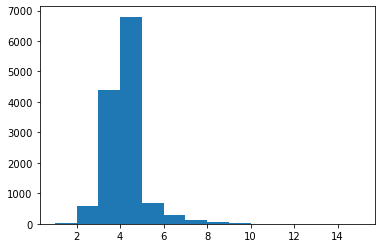

In [81]:
plt.hist(ricnn_counts, np.arange(1, 16))

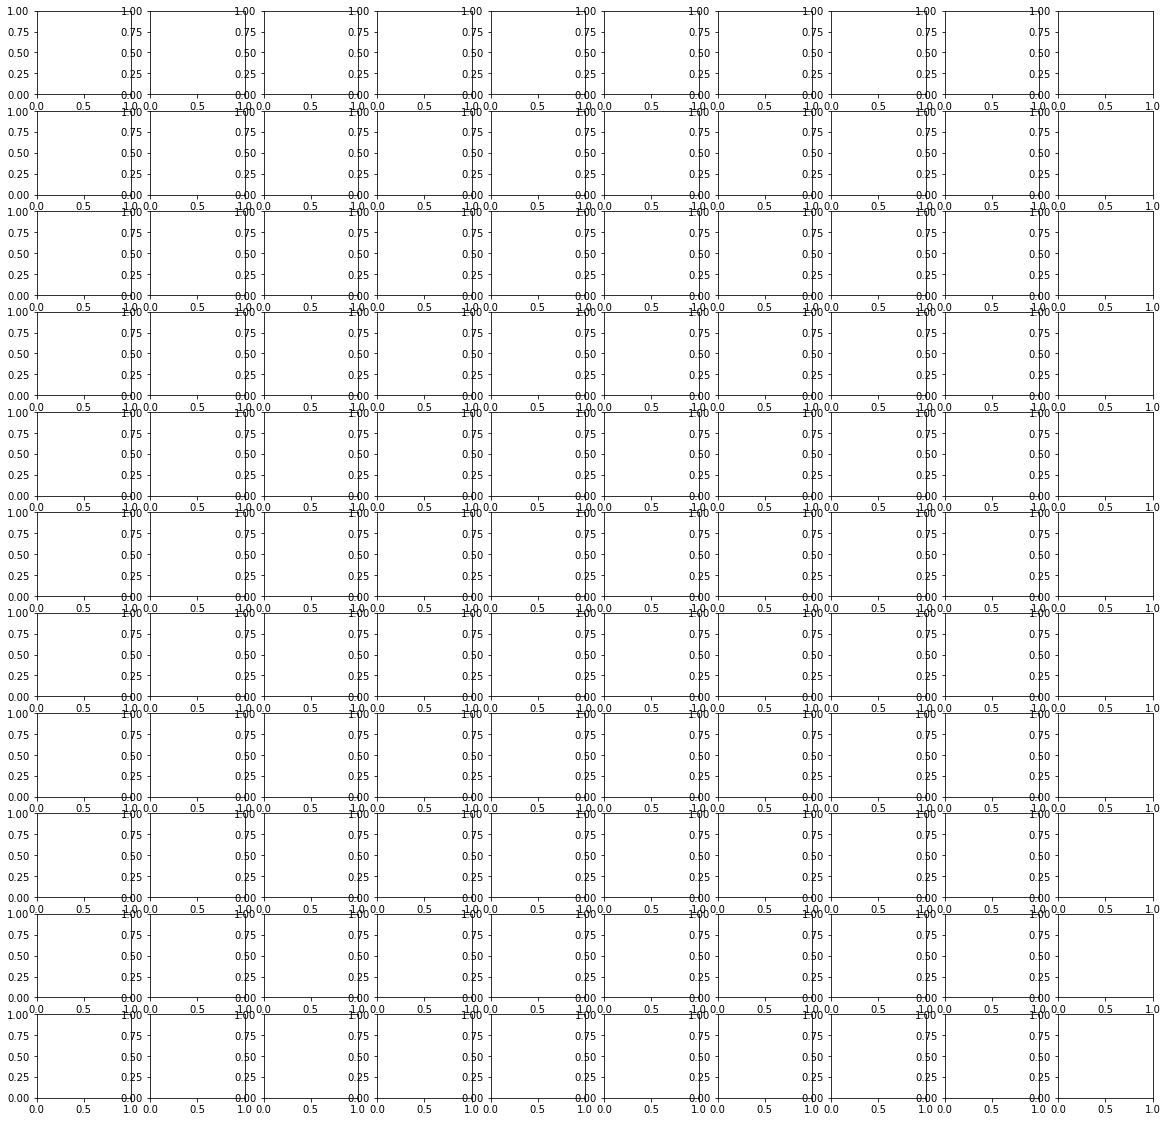

In [39]:
F, ax = plt.subplots(11, 10, figsize=(20, 20))
for n, ind in enumerate(ricnn_uniq[ricnn_counts >= 12]):
    i = n // 10
    j = n % 10
    ax[i, j].imshow(input_test_norm[ind, :, :, 0])
    mask = np.ma.masked_where(test_masks[ind, :, :] == 0, test_masks[ind, :, :])
    ax[i, j].imshow(mask, alpha=.5, cmap='spring')
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
F.set_facecolor("white")

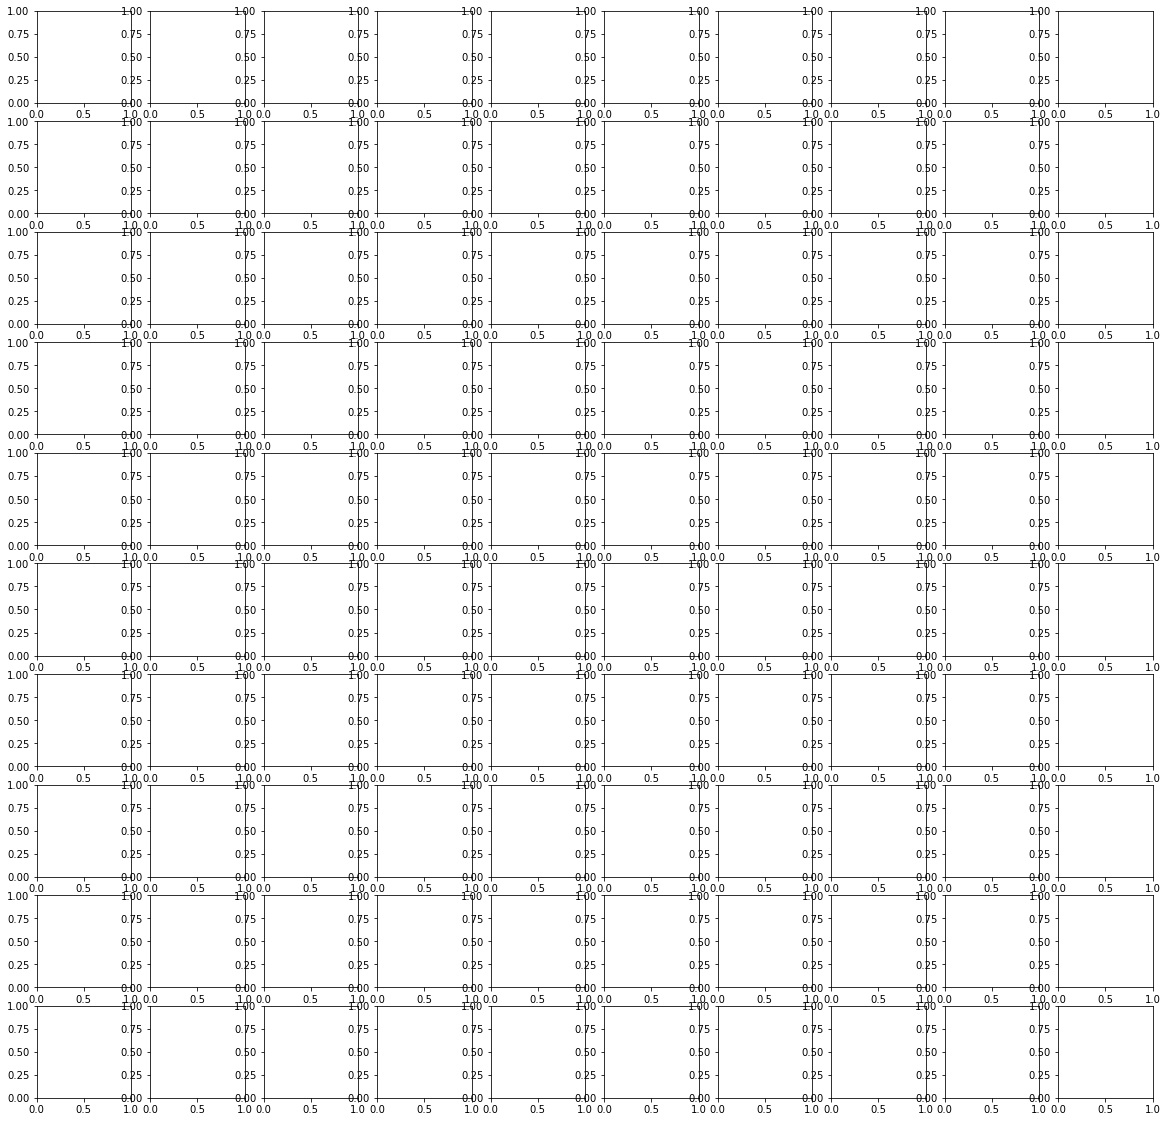

In [40]:
F, ax = plt.subplots(10, 10, figsize=(20, 20))
for n, ind in enumerate(ricnn_uniq[ricnn_counts == 4][0:100]):
    i = n // 10
    j = n % 10
    ax[i, j].imshow(input_test_norm[ind, :, :, 0])
    mask = np.ma.masked_where(test_masks[ind, :, :] == 0, test_masks[ind, :, :])
    ax[i, j].imshow(mask, alpha=.5, cmap='spring')
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
F.set_facecolor("white")

In [41]:
np.unique(ricnn_l_preds.nonzero()[1]).shape

(2,)

In [82]:
cnn_uniq, cnn_counts = np.unique(cnn_l_preds.nonzero()[0], return_counts=True)
cnn_counts.mean()

3.0810998151571165

(array([ 126., 1608., 9913.,  591.,  319.,  199.,  123.,   59.,   42.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <BarContainer object of 9 artists>)

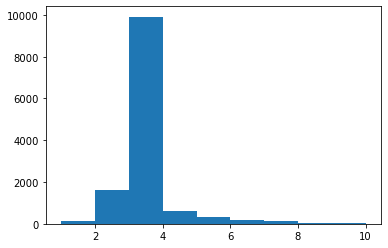

In [83]:
plt.hist(cnn_counts, np.arange(1, 11))

In [44]:
np.unique(cnn_l_preds.nonzero()[1]).shape

(16,)

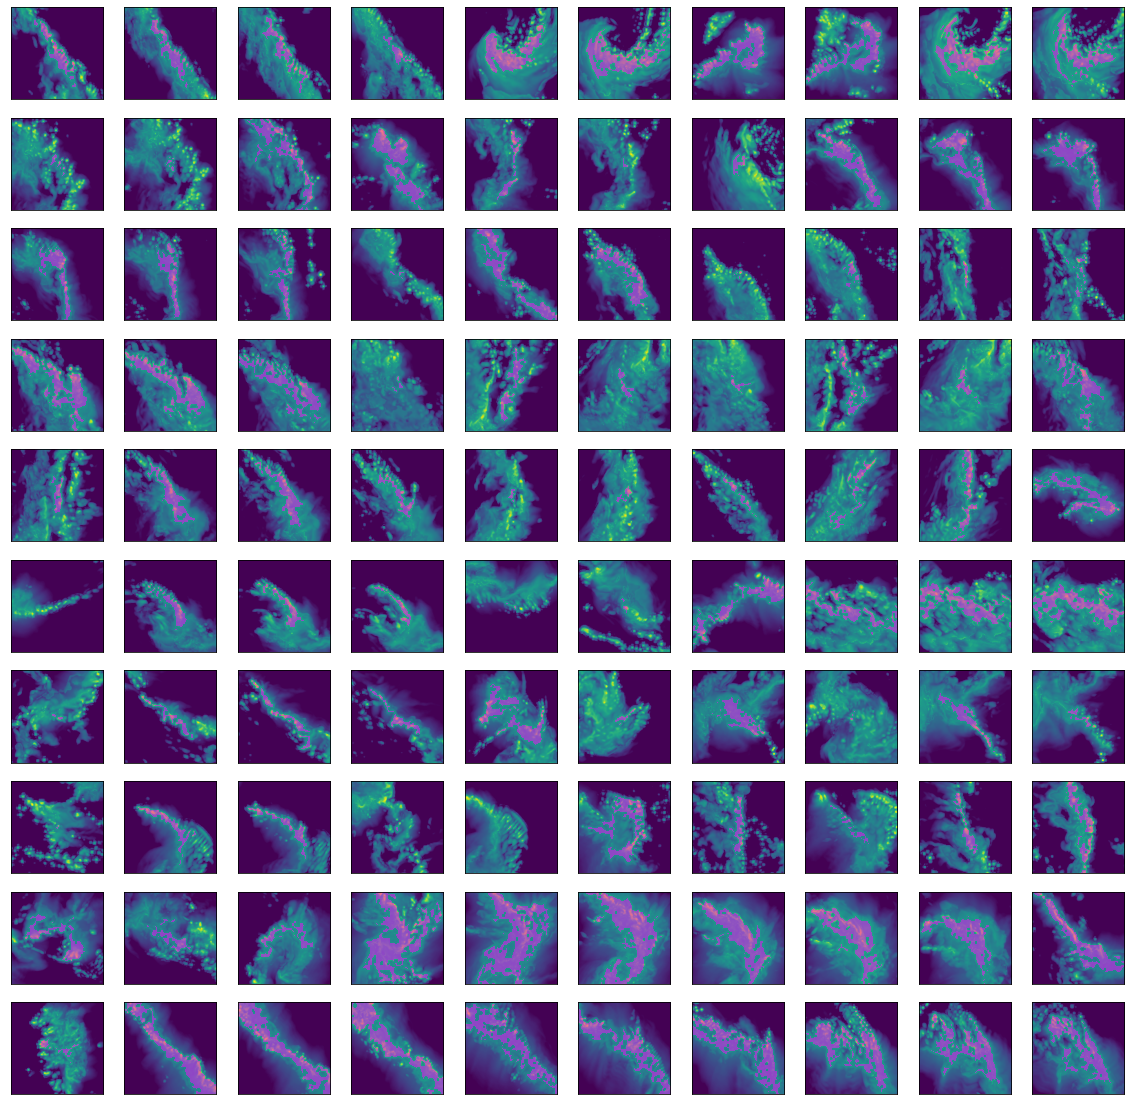

In [45]:
F, ax = plt.subplots(10, 10, figsize=(20, 20))
for n, ind in enumerate(cnn_uniq[cnn_counts >= 8][-100:]):
    i = n // 10
    j = n % 10
    ax[i, j].imshow(input_test_norm[ind, :, :, 0])
    mask = np.ma.masked_where(test_masks[ind, :, :] == 0, test_masks[ind, :, :])
    ax[i, j].imshow(mask, alpha=.5, cmap='spring')
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
F.set_facecolor("white")

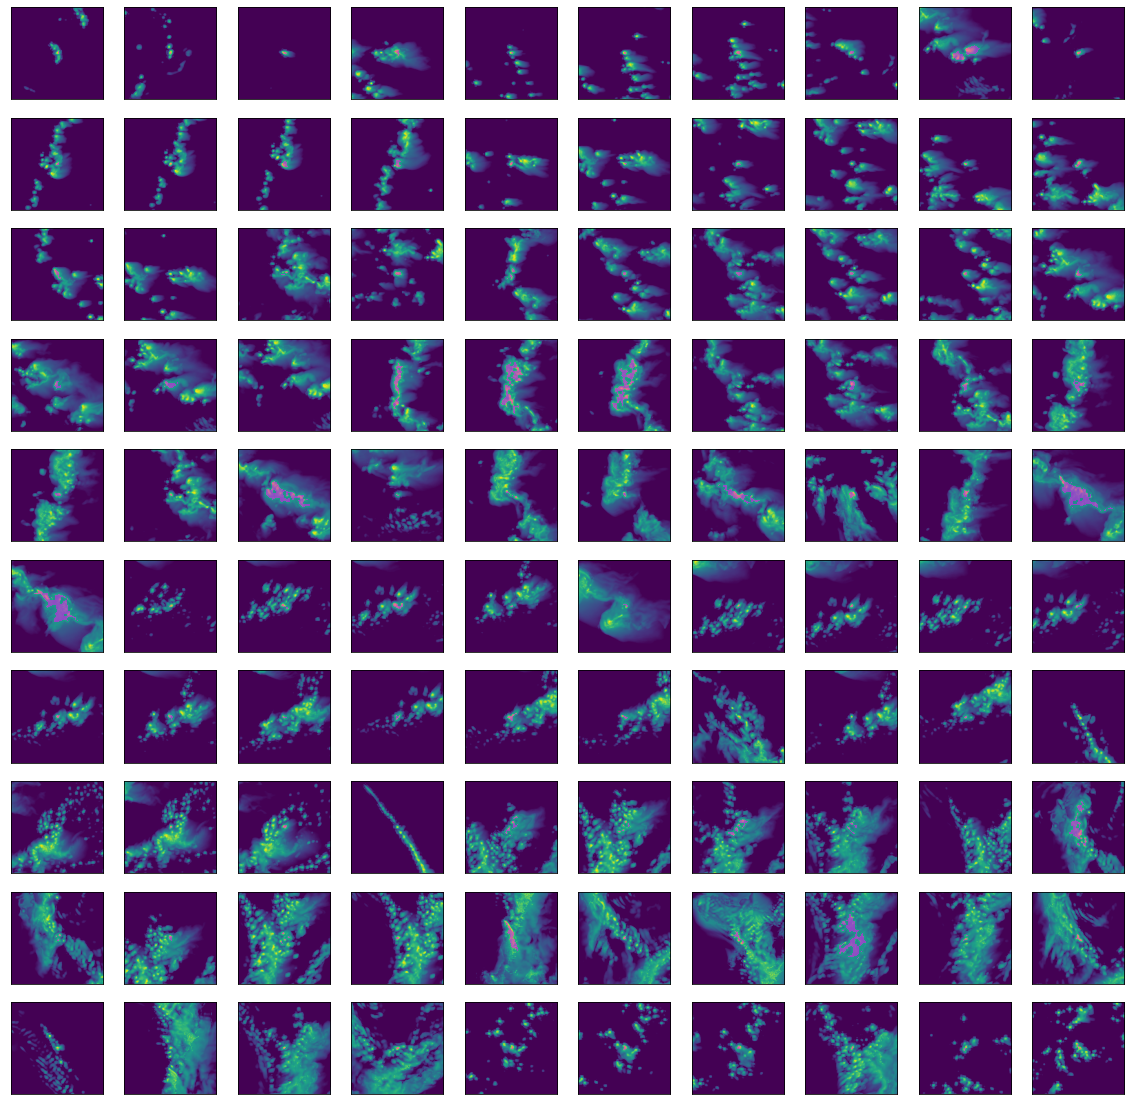

In [46]:
F, ax = plt.subplots(10, 10, figsize=(20, 20))
for n, ind in enumerate(cnn_uniq[cnn_counts == 5][0:100]):
    i = n // 10
    j = n % 10
    ax[i, j].imshow(input_test_norm[ind, :, :, 0])
    mask = np.ma.masked_where(test_masks[ind, :, :] == 0, test_masks[ind, :, :])
    ax[i, j].imshow(mask, alpha=.5, cmap='spring')
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
F.set_facecolor("white")

In [37]:
imgs = np.argsort(output_test_norm[:, 0])[::1000]

In [38]:
vmin = input_train_norm.min()
vmax = input_train_norm.max()

In [41]:
imgs[11]

<xarray.DataArray ()>
array(4610)
Coordinates:
    p         int64 567
    variable  <U17 'major_axis_length'

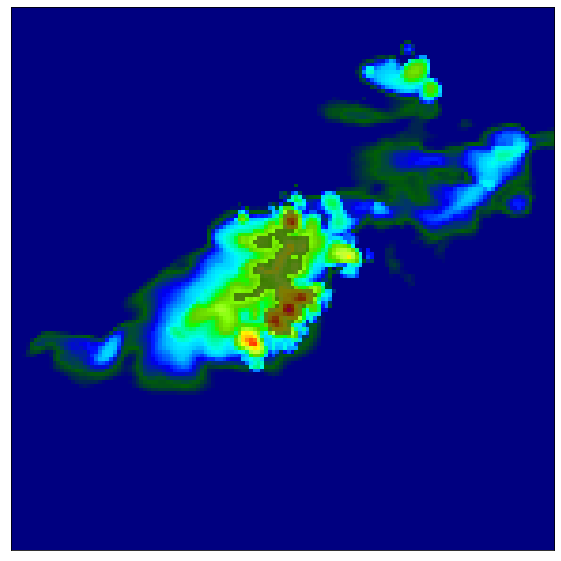

In [44]:
ind = 10
F, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(input_test_norm[imgs[ind], :, :, 0], cmap='gist_ncar', clim=(vmin, vmax))
mask = np.ma.masked_where(test_masks[imgs[ind], :, :] == 0, test_masks[imgs[ind], :, :])
ax = plt.gca()
ax.imshow(mask, alpha=.5, cmap='gray')
ax.set_xticks([])
ax.set_yticks([])
F.set_facecolor('white')

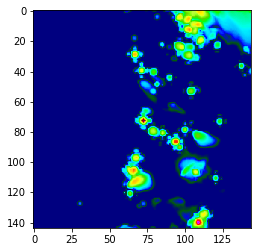

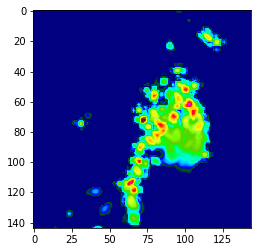

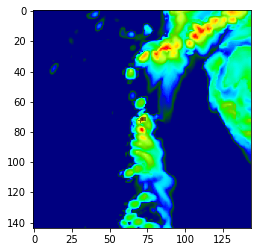

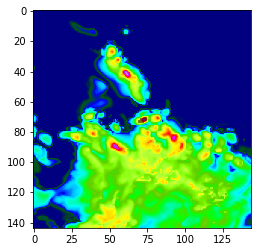

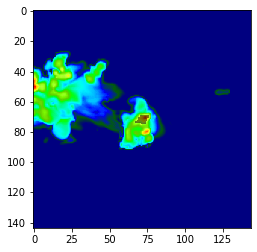

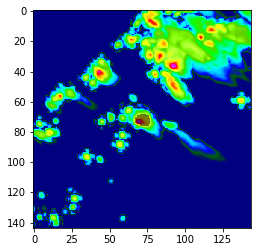

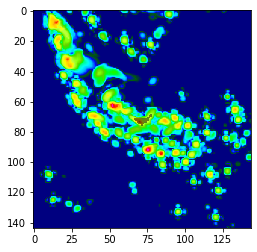

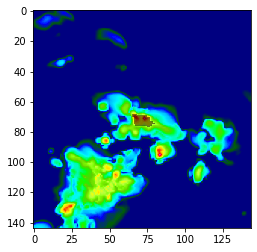

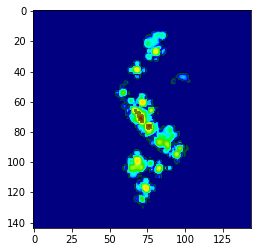

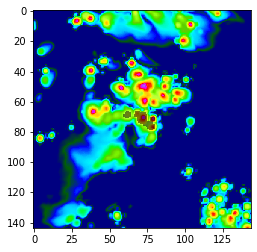

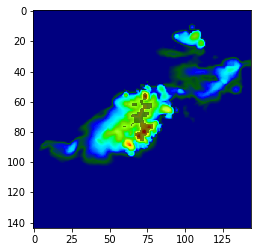

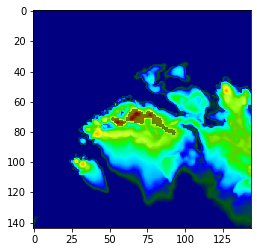

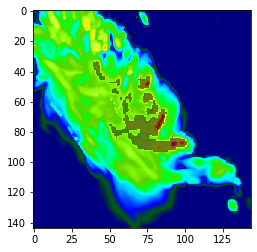

In [39]:
for img in imgs:
    plt.imshow(input_test_norm[img, :, :, 0], cmap='gist_ncar', clim=(vmin, vmax))
    mask = np.ma.masked_where(test_masks[img, :, :] == 0, test_masks[img, :, :])
    ax = plt.gca()
    ax.imshow(mask, alpha=.5, cmap='gray')
    plt.show()